<a href="https://colab.research.google.com/github/mhdali0001/Makine-ogrenme/blob/main/final_%C3%B6dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0) veriyi yükleyin ve gerekli yerlerde random_state kullanın ki, kodunuzun sonucu, sonrasında değişmesin.


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 41.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=754a8ec2b6303d0c02d0bcd73b976bf2a71e72f9bb1813bc571acc5c62a393f7
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [4]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [5]:

titanic_DataSet = pd.read_csv('/content/drive/MyDrive/makine öğrenme/train.csv')
# set seed for reproducibility
np.random.seed(0)

1) Data'nın büyüklüğünü bulun.


In [6]:
titanic_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2) Data'nın nasıl göründüğünü gösterin. (İlk 5 satır veya son 5 satır)


In [7]:
titanic_DataSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3) Data'nın sütunlarında hangi veri türleri bulunmaktadır?


In [8]:
titanic_DataSet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

4) Hangi sütunda, kaç tane eksik verimiz var?


In [9]:

# get the number of missing data points per column
missing_values_count = titanic_DataSet.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

5) Verimizin count, mean, std. dev, quartile gibi özelliklerini gösterin.


In [10]:
titanic_DataSet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6) Verimizde inconsistent data entry var mı, kontrol edin.


In [11]:
inconsistent_values = titanic_DataSet['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

inconsistent_values.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

7) Kategorik ve sayısal veriler için gerekli görsellerden çıkarım yapın. (Vizedeki gibi değil, gerçekten mantıklı olduğunu düşündüğünüz şeyleri gösterin. (Ne gereğinden az, ne de anlamsız derecede fazla))


Text(0, 0.5, 'Pclass and Survived')

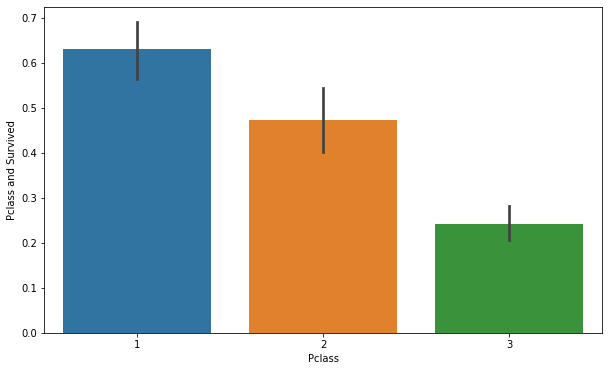

In [12]:
plt.figure(figsize=(10,6))

# Add title

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=titanic_DataSet['Pclass'], y=titanic_DataSet['Survived'])

# Add label for vertical axis
plt.ylabel("Pclass and Survived")

Text(0, 0.5, 'Age')

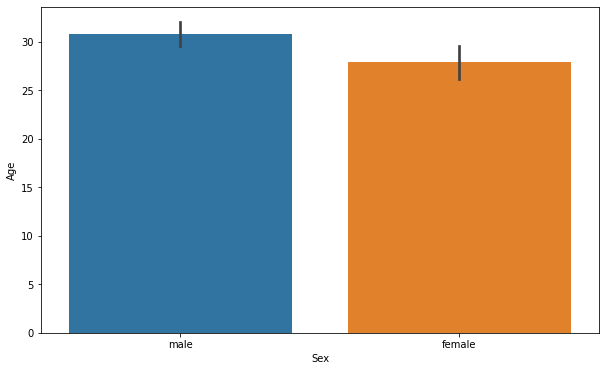

In [13]:
plt.figure(figsize=(10,6))

# Add title

sns.barplot(x=titanic_DataSet['Sex'], y=titanic_DataSet['Age'])

plt.ylabel("Age")

Text(0, 0.5, 'Survived')

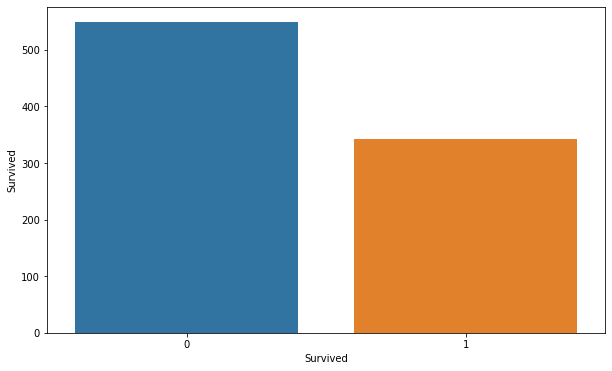

In [14]:
plt.figure(figsize=(10,6))

# Add title

sns.barplot(x=titanic_DataSet['Survived'], y=titanic_DataSet['Survived'].value_counts())

plt.ylabel("Survived")

8) Eksik verilerimiz için gerekli imputationları yapın.


1) Embarked boş değerleri doldurma

In [15]:
imputation_Embarked = titanic_DataSet['Embarked'].value_counts()
imputation_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
titanic_DataSet['Embarked'] = titanic_DataSet.Embarked.fillna('S')
titanic_DataSet[pd.isnull(titanic_DataSet.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


2) Age boş değerleri doldurma



In [17]:
titanic_DataSet['Age'] = titanic_DataSet.Age.fillna(titanic_DataSet['Age'].mean())
titanic_DataSet[pd.isnull(titanic_DataSet.Age)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


3) Cabin boş değerleri doldurma


In [18]:
titanic_DataSet['Cabin'] = titanic_DataSet.Cabin.fillna("Unknown")
titanic_DataSet[pd.isnull(titanic_DataSet.Cabin)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


9) Eğer inconsistent data entry varsa, düzeltin.


In [19]:
inconsistent_values = titanic_DataSet['Name']
inconsistent_values = inconsistent_values.replace('Ms', 'Miss')
inconsistent_values = inconsistent_values.replace('Mme', 'Mrs')
inconsistent_values = inconsistent_values.replace('Mlle', 'Miss')
titanic_DataSet['Name'] = inconsistent_values
titanic_DataSet

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


10) Kategorik değişkenleri, sayısal hale getirin.

In [20]:
titanic_DataSet_copy = titanic_DataSet
Sayisal_hale = {'male':1,'female':2}
Sayisal_hale_Embarked = {'S':1,'C':2,'Q':3}
titanic_DataSet_copy = titanic_DataSet_copy.replace({'Sex': Sayisal_hale})
titanic_DataSet_copy = titanic_DataSet_copy.replace({'Embarked':Sayisal_hale_Embarked})
titanic_DataSet_copy = titanic_DataSet_copy.drop(['Name','Ticket','Cabin'], axis=1)
titanic_DataSet_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,1
1,2,1,1,2,38.000000,1,0,71.2833,2
2,3,1,3,2,26.000000,0,0,7.9250,1
3,4,1,1,2,35.000000,1,0,53.1000,1
4,5,0,3,1,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,1
887,888,1,1,2,19.000000,0,0,30.0000,1
888,889,0,3,2,29.699118,1,2,23.4500,1
889,890,1,1,1,26.000000,0,0,30.0000,2


11)Kendi sezginize göre yeni özellik değişkenleri yaratın. (Bu kısmın önemini tahmin edebiliyorsunuzdur.) Ekstra yarattığınız her özelliği neden yarattığınızı ve ne işe yarayacağını güzel bir şekilde yorumlayın/anlatın.

In [21]:
inconsistent_values = titanic_DataSet['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
inconsistent = ['Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Lady', 'Countess','Capt', 'Col', 'Don',  'Dona']
inconsistent_values = inconsistent_values.replace(inconsistent, 'Other')
inconsistent_values = inconsistent_values.replace('Ms', 'Miss')
inconsistent_values = inconsistent_values.replace('Mme', 'Mrs')
inconsistent_values = inconsistent_values.replace('Mlle', 'Miss')
titanic_DataSet_copy['unvan'] = inconsistent_values
titanic_DataSet_copy['unvan'].value_counts()
values = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Other':5}
titanic_DataSet_copy = titanic_DataSet_copy.replace({'unvan': values})
titanic_DataSet_copy['unvan']

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: unvan, Length: 891, dtype: int64

In [22]:
Cabin_values = titanic_DataSet['Cabin'].str.extract('([A-Za-z]+)', expand=False)

New = ['A', 'B', 'C','D','E', 'F', 'G', 'T',"Unknown"]
for i in range(0,9):
  Cabin_values = Cabin_values.replace(New[i], i+1)
Cabin_values.value_counts()
titanic_DataSet_copy['katman'] = Cabin_values
titanic_DataSet_copy['katman']

0      9
1      3
2      9
3      3
4      9
      ..
886    9
887    2
888    9
889    3
890    9
Name: katman, Length: 891, dtype: int64

In [23]:
titanic_DataSet_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,unvan,katman
0,1,0,3,1,22.0,1,0,7.2500,1,1,9
1,2,1,1,2,38.0,1,0,71.2833,2,3,3
2,3,1,3,2,26.0,0,0,7.9250,1,2,9
3,4,1,1,2,35.0,1,0,53.1000,1,3,3
4,5,0,3,1,35.0,0,0,8.0500,1,1,9


12) Mutual information skorlarına bakın. 


In [24]:

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=False, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
titanic_DataSet_copy_X = titanic_DataSet_copy.copy()
titanic_DataSet_copy_y = titanic_DataSet_copy_X.pop("Survived")

mi_scores = make_mi_scores(titanic_DataSet_copy_X, titanic_DataSet_copy_y)
mi_scores

unvan          0.205249
Sex            0.137069
Fare           0.131350
katman         0.068595
Age            0.023314
Pclass         0.021513
SibSp          0.011851
PassengerId    0.009535
Parch          0.008062
Embarked       0.000000
Name: MI Scores, dtype: float64

13) Şimdi tekrar 7. Adımdaki gibi, aslında sezginize göre mantıklı olması gereken, ancak iyi mutual information score vermeyen, değişkenlerin, tek başına hedef değişkenle veya başka değişkenlerle etkileşim halinde hedef değişkenle olan plotlarını çizdirin.(İçlerinden sadece kullanıcaklarınızı veya mantıklı gelenleri çizdirin.) Buradan çıkılan yolla, yeni özellik değişkenleri yaratabiliyorsanız yaratın.


Text(0, 0.5, 'Embarked and Survived')

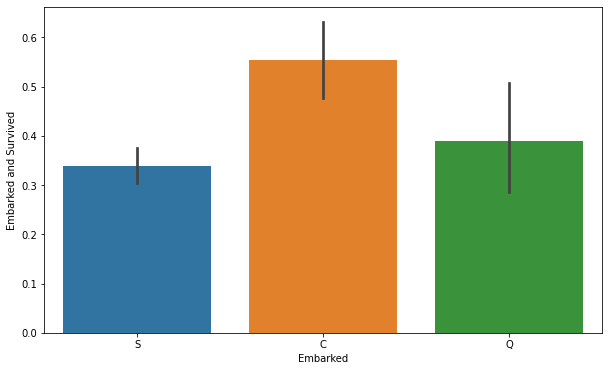

In [25]:
plt.figure(figsize=(10,6))

# Add title

sns.barplot(x=titanic_DataSet['Embarked'], y=titanic_DataSet['Survived'])

plt.ylabel("Embarked and Survived")

Text(0, 0.5, 'Parch and Survived')

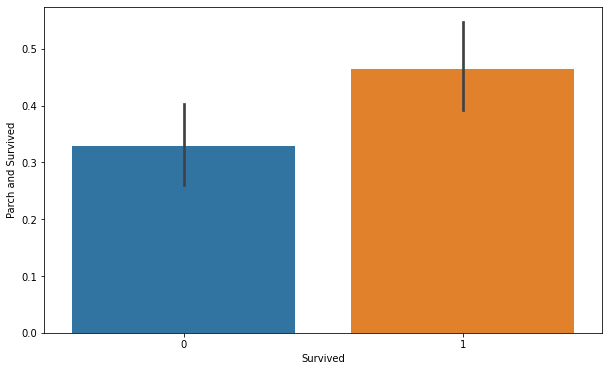

In [26]:
plt.figure(figsize=(10,6))

# Add title

sns.barplot(x=titanic_DataSet['Survived'], y=titanic_DataSet['Parch'])

plt.ylabel("Parch and Survived")


14) K-means clustering ile var olan değişkenlerden faydalanarak yeni değişkenler yaratabiliyorsanız yaratın. tek başına hedef değişkenle olan plotlarını çizdirin.


In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
features = ['PassengerId','Pclass','Embarked','Fare']
titanic_DataSet_kmeans = titanic_DataSet_copy_X[features]
titanic_DataSet_copy_X["Ekonomik durumu"] = kmeans.fit_predict(titanic_DataSet_kmeans)
titanic_DataSet_copy_X["Ekonomik durumu"] = titanic_DataSet_copy_X["Ekonomik durumu"]

titanic_DataSet_copy_X.head()
titanic_DataSet_copy_X["Ekonomik durumu"].value_counts()

2    297
0    297
1    297
Name: Ekonomik durumu, dtype: int64

Text(0, 0.5, 'Parch and Survived')

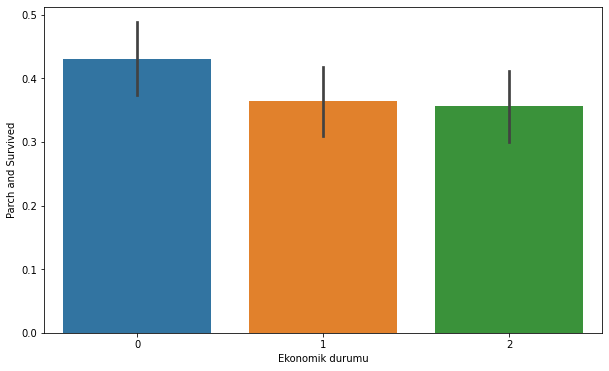

In [28]:
plt.figure(figsize=(10,6))

# Add title

sns.barplot(x=titanic_DataSet_copy_X['Ekonomik durumu'], y=titanic_DataSet['Survived'])

plt.ylabel("Parch and Survived")

15) Principle component analysis ile değişkenlerimizi daha anlamlı hale getirebiliyor isek, yeni değişkenleri modele ekleyin. tek başına hedef değişkenle olan plotlarını çizdirin.


In [29]:
from sklearn.decomposition import PCA

from sklearn.feature_selection import mutual_info_regression
titanic_DataSet_pca_x = titanic_DataSet
titanic_DataSet_pca_x
X_scaled = (titanic_DataSet_copy_X - titanic_DataSet_copy_X.mean(axis=0) ) / titanic_DataSet_copy_X.std(axis=0)


# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=titanic_DataSet_copy_X.columns,  # and the rows are the original features
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
PassengerId,0.042973,-0.127846,-0.694438,0.022964,0.019837,0.053248,-0.220796,0.527607,0.395129,-0.107570,0.031461
Pclass,-0.518989,0.260392,-0.085207,-0.084792,0.069472,0.128089,0.131538,-0.017511,0.151671,0.069561,-0.762701
Sex,0.276902,0.327303,-0.043241,-0.463526,-0.347609,-0.128371,0.277674,-0.239649,0.432365,-0.373736,0.031748
Age,0.158494,-0.404066,0.093924,-0.042320,-0.282042,0.823248,0.062996,-0.112145,0.126836,0.041987,-0.096531
SibSp,0.103768,0.464129,-0.022874,0.340545,0.279144,0.308990,-0.505335,-0.365392,0.153016,-0.261359,0.057691
Parch,0.188791,0.457621,-0.097729,0.261339,0.084962,0.308193,0.581675,0.362317,-0.296574,-0.092354,0.093731
Fare,0.480773,-0.020599,0.049193,0.158256,0.366637,-0.121181,0.213855,-0.104866,0.441249,0.559297,-0.166178
Embarked,0.032288,-0.004490,0.053937,-0.694971,0.648768,0.223885,-0.051798,0.105863,-0.123336,-0.044806,0.104450
unvan,0.291049,0.391512,-0.058629,-0.275868,-0.380357,0.055711,-0.412875,0.165061,-0.288655,0.483583,-0.140745
katman,-0.507470,0.225556,-0.096912,-0.070497,-0.079572,0.166323,0.118624,-0.128761,0.260408,0.458186,0.578657


In [30]:
def make_mi_scores_pca(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores_pca(X_pca, titanic_DataSet_copy_y, discrete_features=False)
mi_scores

PC1     0.144680
PC4     0.138851
PC10    0.074738
PC2     0.065620
PC7     0.047044
PC5     0.044426
PC11    0.041657
PC6     0.039466
PC9     0.020801
PC3     0.012498
PC8     0.000000
Name: MI Scores, dtype: float64

In [31]:
idx = X_pca["PC7"].sort_values(ascending=False).index
cols = titanic_DataSet_copy_X.columns
titanic_DataSet_copy_X.loc[idx, cols]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,unvan,katman,Ekonomik durumu
678,679,3,2,43.000000,1,6,46.9000,1,3,9,1
13,14,3,1,39.000000,1,5,31.2750,1,1,9,2
638,639,3,2,41.000000,0,5,39.6875,1,3,9,1
438,439,1,1,64.000000,1,4,263.0000,1,1,3,0
25,26,3,2,38.000000,1,5,31.3875,1,3,9,2
...,...,...,...,...,...,...,...,...,...,...,...
824,825,3,1,2.000000,4,1,39.6875,1,4,9,1
599,600,1,1,49.000000,1,0,56.9292,2,5,1,1
787,788,3,1,8.000000,4,1,29.1250,3,4,9,1
245,246,1,1,44.000000,2,0,90.0000,3,5,3,2


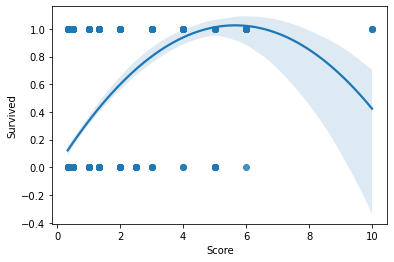

In [32]:
titanic_DataSet_copy['Score'] = titanic_DataSet_copy_X['Sex']*titanic_DataSet_copy_X['unvan']/titanic_DataSet_copy_X['Pclass'] 
titanic_DataSet_copy_X['Score'] = titanic_DataSet_copy['Score']
sns.regplot(x="Score", y='Survived', data=titanic_DataSet_copy, order=2);


16) İlk naif modelimizi oluşturun. (Decision Tree,Random Forest veya XGBoost)


In [33]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y  = train_test_split(titanic_DataSet_copy_X,titanic_DataSet_copy_y,random_state = 1)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.27542600896860986


In [35]:
from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor_model = DecisionTreeRegressor()
# Fit model
DecisionTreeRegressor_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = DecisionTreeRegressor_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.2645739910313901


In [36]:
from xgboost import XGBRegressor

XGBRegressor_model = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=4)
XGBRegressor_model.fit(train_X, train_y ,early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)

XGBRegressor_predictions = XGBRegressor_model.predict(val_X)
print(mean_absolute_error(val_y, XGBRegressor_predictions))

[14:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.30908355678143523


17) Permutation importance'larına bakın.
:

In [37]:
import eli5
from eli5.sklearn import PermutationImportance
feature_names = [i for i in titanic_DataSet_copy.columns if titanic_DataSet_copy[i].dtype in [np.int64]]

perm = PermutationImportance(DecisionTreeRegressor_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.6382 ± 0.0748,unvan
0.2384 ± 0.0656,Pclass
0.2017 ± 0.1063,Fare
0.1394 ± 0.0549,Parch
0.0954 ± 0.0748,Age
0.0880 ± 0.0995,katman
0.0770 ± 0.0939,SibSp
0.0293 ± 0.1584,PassengerId
0.0183 ± 0.0696,Embarked
0 ± 0.0000,Score


18) SHAP değerlerine bakın.(Shap values,2D partial Dependence Plots,Summary plots, Shap dependence Contribution plots) Bunları yorumlayın.


In [38]:
import shap  # package used to calculate Shap values

from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

row_to_show = 8
data_for_prediction = val_X.iloc[row_to_show]

data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(RandomForestClassifier_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

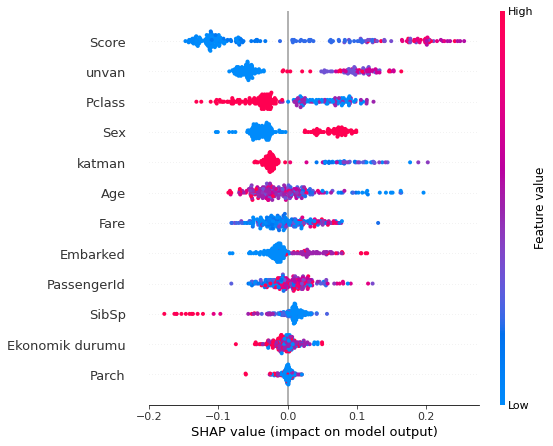

In [39]:
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_valuesl = explainer.shap_values(val_X)

shap.summary_plot(shap_valuesl[1], val_X)


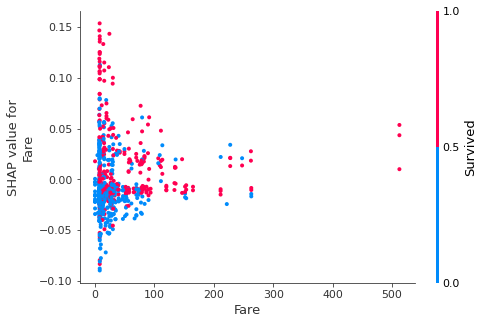

In [40]:
shap_valuesm = explainer.shap_values(titanic_DataSet_copy_X)

# make plot.
shap.dependence_plot('Fare', shap_valuesm[1], titanic_DataSet_copy, interaction_index="Survived")

19) Yine yeni özellik adına bir fikir verdiyse kullanın. Mutual information skoruna bakın.


In [43]:
def distance_str(row):
    if row.Fare < 20:
        return  1  #ucuz
    elif 20 < row.Fare and row.Fare < 60:
        return 2 #orta
    else:
        return 3 #pahalı
titanic_DataSet_copy["fıyat sınıfı"] = titanic_DataSet_copy.apply(distance_str, axis=1)
titanic_DataSet_copy_X["fıyat sınıfı"] = titanic_DataSet_copy["fıyat sınıfı"]
titanic_DataSet_copy["fıyat sınıfı"]


0      1
1      3
2      1
3      2
4      1
      ..
886    1
887    2
888    2
889    2
890    1
Name: fıyat sınıfı, Length: 891, dtype: int64

In [44]:
mi_scores = make_mi_scores(titanic_DataSet_copy_X, titanic_DataSet_copy_y)
mi_scores

Score              0.255617
unvan              0.171547
Sex                0.150548
Fare               0.114217
katman             0.059669
Pclass             0.046573
SibSp              0.035436
fıyat sınıfı       0.031078
Age                0.016680
PassengerId        0.015780
Embarked           0.003045
Ekonomik durumu    0.001970
Parch              0.000000
Name: MI Scores, dtype: float64

20) Herhangi bir data leakage endişesi yaşıyor musunuz? Data leakage türleri nelerdir ve hangi durumlarda görülür, birer örnek verin.


Evet yeni ekledim Katman feature. katman feature Cabin sütününden katman numarası alıp oluşturdum. Çok fazla boş veriler var olduğu için veriler yerine 0 kullandım. Bunu modülün performansı ilerde etkiiebilir.

21) Pipeline'lar yaratın.


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = [cname for cname in train_X.columns if train_X[cname].nunique() < 10 and 
                        train_X[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in train_X.columns if train_X[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = train_X[my_cols].copy()
X_valid = val_X[my_cols].copy()

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(val_y, preds)
print('MAE:', score)


MAE: 0.2733183856502242



22) Decision Tree modeli ile, pipeline üzerinden cross validation yaparak, değişik parametreler deneyerek içlerinden en iyi sonuç vereni bulun. (Mümkün oldukça overfitten kaçının)


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', DecisionTreeRegressor())
                             ])

# Multiply by -1 since sklearn calculates *negative* MAE
DecisionTreeRegressor_scores = -1 * cross_val_score(my_pipeline, titanic_DataSet_copy_X, titanic_DataSet_copy_y,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", DecisionTreeRegressor_scores)

MAE scores:
 [0.26666667 0.21348315 0.28089888 0.3258427  0.14606742 0.23595506
 0.24719101 0.20224719 0.15730337 0.16853933]


23) Random Forest modeli ile, pipeline üzerinden cross validation yaparak, değişik parametreler deneyerek içlerinden en iyi sonuç vereni bulun. (Mümkün oldukça overfitten kaçının)


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=100,
                                                              random_state=0))
                             ])

# Multiply by -1 since sklearn calculates *negative* MAE
RandomForestRegressor_scores = -1 * cross_val_score(my_pipeline, titanic_DataSet_copy_X, titanic_DataSet_copy_y,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", RandomForestRegressor_scores)

MAE scores:
 [0.30388889 0.25359551 0.28674157 0.2788764  0.22101124 0.31853933
 0.2141573  0.23910112 0.22292135 0.21730337]


24) Xgboost modeli ile, pipeline üzerinden cross validation yaparak, değişik parametreler deneyerek içlerinden en iyi sonuç vereni bulun. (Mümkün oldukça overfitten kaçının)


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', XGBRegressor(n_estimators=500,learning_rate=0.05, n_jobs=4))
                             ])

# Multiply by -1 since sklearn calculates *negative* MAE
scores_XGBRegressor = -1 * cross_val_score(my_pipeline, titanic_DataSet_copy_X, titanic_DataSet_copy_y,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores_XGBRegressor)

[14:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

25) Her bir model için, en iyi modellerinizin ne olduğunu yazın. (Comment olarak.)
Örnek->(XGBoost_model_2, Random_forest_model_5,Decision_tree_model_7 gibi.)

In [50]:
scores_XGBRegressor_best = min(scores_XGBRegressor)
RandomForestRegressor_scores_best = min(RandomForestRegressor_scores)
DecisionTreeRegressor_scores_best = min(DecisionTreeRegressor_scores)
#Decision_tree_model_5
#XGBoost_model_10
#Random_forest_model_10
print (scores_XGBRegressor_best,RandomForestRegressor_scores_best,DecisionTreeRegressor_scores_best)


0.19905537098981022 0.21415730337078653 0.14606741573033707


26) 25. Adımdaki en iyi modellerin içerisinden, hangisinin en iyi olduğunu düşünüyorsanız, onu da ayrıca belirtin.


Decision tree en iyi sonuç Verdi.
 Çünkü en düşük MAE sahiptir.
